## **Previsão de Churn em Clientes de Serviços Bancários com Cartão de Crédito** ##

Neste projeto, construirei um modelo de machine learning para prever a probabilidade de cancelamento de clientes (churn) em um serviço empresarial. O problema é de aprendizado supervisionado (com um conjunto de dados rotulado) para classificação binária, onde a variável alvo é 1 se o cliente cancelou, e 0 caso contrário.

Utilizarei o seguinte pipeline, com base na metodologia CRIP-DM:
1. Definir o problema de negócio.
2. Coletar os dados e obter uma visão geral.
3. Dividir so dados entre conjunto de treino e conjunto de teste.
4. Explorar os dados (análise exploratória - EDA).
5. Engenharia de atributos, limpeza e pré-processamento.
6. Treinamento do modelo, comparação, selecção de atributos e ajustes.
7. Teste a avaliação do modelo.
8. Conclusão e interpretação dos resultados.
9. Deploy.

Neste notebook, realizarei a análise exploratória dos dados (EDA), cobrindo os passos de 1 a 4 da pipeline acima. O objetivo é identificar padrões relevantes que nos ajudem a entender o perfil dos clientes que mais têm tendência a cancelar o serviço. Assim, mesmo antes de aplicar o modelo, já poderemos oferecer insights úteis para estratégias de retenção.

1. **Problema de Negócio**

A equipe de gestão está preocupada com a crescente taxa de cancelamento de clientes nos serviços oferecidos. Eles desejam um sistema que permitar prever, com antecedência, quais clientes estão em risco de churn, a fim de agir preventivamente com campanhas personalizadas, ofertas ou melhorias no atendimento.

**1.1 Qual o objetivo deste projeto?**
1. Identificar fatores associados ao churn.
2. Criar um modelo que preveja a probabilidade de um cliente cancela.
3. Propor ações praicas para reduzir o churn com base nos resultados.

**1.2 Por que prever a probabilidade e não apenas churn sim/não?**
Ao prever a probabilidade de churn, conseguimos priorizar os clientes com maior risco, o que permite estratégias de retenção mais eficazes. Um modelo com previsões binarias pode ocultar nuances importantes. Já com pontuação de risco (ex: 83% de chance de churn), a empresa pode: 
* Agir rápidamente nos casos mais críticos.
* Distribuir os recursos de forma mais eficiente.
* Adaptar campanhas conforme o nível de risco.

**1.3 Quais os benfícios esperados?**
* Redução de custos com aquisição e retenção de clientes.
* Aumento na taxa de retenção.
* Melhoria na experiência dos clientes, com ações preventivas.
* Marketing mais direcionado eficiente.
* Proteção da receita, mantendo a base ativa de clientes.

Com isso, espera-se atacar a raiz do problema de churn e torna-lo previsível e gerenciavel.

2. **Entendimento do Dados**

O Conjunto de dados foi obetido atravéz do Kaggle, no seguinte link:
https://www.kaggle.com/datasets/rangalamahesh/bank-churn

A base contém informações detalhadas sobre clientes de um banco, incluindo dados demográficos, de perfil financeiro e caracteristicas contratuais. O objetivo é prever se um cliente deixará de utilizar os serviços do banco (churn). A variável alvo já está presente, onde: 
* `Exited = 1` indica que o cliente **cancelou** os seviços do banco.
* `Exited = 0` Indica que o cliente **permaneceu ativo**.

Carregando os dados

In [1]:
import pandas as pd
df = pd.read_csv(r'./data/Customer-Churn-Records.csv')

In [2]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

`CreditScore` - Pontuação de crédito do cliente. Valores mais altos indicam melhor histórico creditício e menor propensão a churn.  
`Geography` - País de residência do cliente (ex: França, Alemanha, Espanha). Fator geográfico que influencia padrões de comportamento.  
`Gender` - Gênero do cliente (Masculino/Feminino/Outro).  
`Age` - Idade do cliente em anos. Relaciona-se com padrões de consumo e risco de churn (ex: faixas etárias específicas têm maior rotatividade).  
`Tenure` - Tempo de relacionamento com o banco (em anos). Clientes com 1-3 anos podem apresentar maior risco de churn.  
`Balance` - Saldo médio anual na conta corrente. Saldos elevados geralmente correlacionam-se com menor probabilidade de saída.  
`NumOfProducts` - Quantidade de produtos bancários contratados (ex: conta corrente, investimentos, empréstimos).  
`HasCrCard` - Indica posse de cartão de crédito (0 = Não, 1 = Sim).  
`IsActiveMember` - Status de atividade do cliente (0 = Inativo, 1 = Ativo). Clientes inativos têm maior risco de churn.  
`EstimatedSalary` - Salário anual estimado do cliente (em unidades monetárias locais).  
`Exited` - **Variável target**: indica se o cliente encerrou o relacionamento com o banco (0 = Retido, 1 = Churn).  
`Complain` - Registro de reclamações formalizadas nos últimos 12 meses (0 = Sem reclamações, 1 = Com reclamações).  
`Satisfaction Score` - Nível de satisfação mensurado em pesquisas.  
`Card Type` - Categoria do cartão predominante (ex: Standard, Gold, Platinum, Premium).  
`Point Earned` - Pontos acumulados no programa de fidelidade associado ao cartão de crédito.  

In [4]:
df.describe().T.reset_index()

,index,count,mean,std,min,25%,50%,75%,max
0,RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
1,CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
2,CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
3,Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
4,Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
5,Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
6,NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
7,HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
8,IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
9,EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


**Estatísticas descritivas - Principais Insights**

Com base na análise descritiva das variáveis numéricas, é possivel destacar os seguintes pontos:
1. `CreditScore`:
    * Média aprovimada de 650 pontos, com desvio padrão de 96.
    * Os scores variam de 350 a 850, o que indica ampla diversidade no perfil de risco dos clientes.
2. `Age`:
    * A média de idade é de 38 anos, como mínimo de 18 e máximo de 92.
    * Clientes de determinadas faixas etárias podem representar maior risco de churn.
3. `Tenure`:
    * Varia de 0 a 10 anos, com a média em 5 anos.
    * O tempo de casa pode ser uma variável importante, clientes novos podem cancelar mais fácilmente.
4. `Balance`:
    * A média do saldo é em torno de 76.000, com desvio padrão alto (62.000), o que indica forte dispersão.
    * O valor máximo é de 250.898, e o mínimo é de 0. Importante verificar se o valdo 0 tem relação com o churn.
5. `NumOfProducts`: 
    * A maior parte dos cliente tem entre 1 e 2 produtos.
    * Há casos com até 4 produtos, que merecem atenção.
6. `EstimatedSalary`:
    * A média é de 100.000, com uma distribuição quase uniforme (mínimo de 11 mil, máximo de 199 mil).
    * Aparentemente, o salário não é um fator limitante, mas pode afetar o churn combinado com outros fatores.
7. `Satisfaction Score`: 
    * A média é de 3.01, com a maioria do clientes ficando entre 2 e 4. A distribuição sugere tendência a neutralidade, com 25% dos clientes ficando abaixo de 2, o que pode representar um grupo crítico.
    * Pode haver uma correlação direta entre baixa satisfação e churn, tornando essa variável potencialmente muito relevante para o modelo preditivo e para estratégias de retenção.

Procurar por dados faltante e duplicados.

In [5]:
print(df['Exited'].value_counts(normalize=True) * 100)

Exited
0    79.62
1    20.38
Name: proportion, dtype: float64


O conjunto está desbalanceado. No momento da avaliação dos modelos, a metrica **acuracia** não podera ser considerada.

In [6]:
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

3. **Divisão dos Dados em Conjuntos de Treino e Teste**

Primeiramente, vou dividir o conjunto de dados em dois subconjunto: **treinamento** e **teste**.
* O conjunto de teste deve conter dados que o modelo ainda não viu durante o treinamento.
* A análise exploratória (EDA) será feita apenas no conjunto de treino, a fim de evitar *data leakage* (vazamanto de dados), garantir uma representação mais realista e permitir uma avaliação mais preicisa do modelo de dados "novos".
* Além disso, utilizarei o parâmetro `stratify=y` na função `train_test_split` para assegurar que a proporção da classe alvo seja mantida em ambos os conjuntos. Isso é especialmente útil em cenários de classses desbalanceadas, como é o caso, já que há mais clientes ativos do que clientes que cancelaram.

In [8]:
df.rename(columns={'Exited':'churn_flag'}, inplace=True)

In [9]:
from sklearn.model_selection import train_test_split

# Separando variaveis preditoras e alvo

X = df.drop(columns=['churn_flag'])
y = df['churn_flag'].copy()

# Divisão entre treino e teste com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

print(f'Formato do conjunto de preditores de treino: {X_train.shape}')
print(f'Formato do conjunto de alvo de treino: {y_train.shape}')
print(f'Formato do conjunto de preditores de teste: {X_test.shape}')
print(f'Formato do conjunto de alvo de teste: {y_test.shape}')


# Proporção das classe
print('\n Proporção das classes no conjunto de treino:')
print(y_train.value_counts(normalize=True))

print('\n Proporção das classes no conjunto de teste:')
print(y_test.value_counts(normalize=True))

Formato do conjunto de preditores de treino: (8000, 17)
Formato do conjunto de alvo de treino: (8000,)
Formato do conjunto de preditores de teste: (2000, 17)
Formato do conjunto de alvo de teste: (2000,)

 Proporção das classes no conjunto de treino:
churn_flag
0    0.79625
1    0.20375
Name: proportion, dtype: float64

 Proporção das classes no conjunto de teste:
churn_flag
0    0.796
1    0.204
Name: proportion, dtype: float64


4. **Análise Exploratória do Dados (EDA)**
Objetivo desta etápa é entender melhor os dados do conjunto, idenfificar padrões, detectar possíveis outliers, e exploar as variáveis mais relevantes para o churn. Tudo isso antes de iniciar a modelagem

In [10]:
df_treino = pd.concat([X_train, y_train], axis=1)
df_treino.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,churn_flag
4791,4792,15746461,Taylor,709,Spain,Male,35,2,0.00,2,1,0,104982.39,0,2,GOLD,422,0
8881,8882,15618647,Kornilova,744,France,Male,29,1,43504.42,1,1,1,119327.75,0,1,PLATINUM,607,0
6166,6167,15567431,Kodilinyechukwu,773,France,Male,64,2,145578.28,1,0,1,186172.85,0,1,SILVER,630,0
4473,4474,15713532,Wang,646,Germany,Female,29,4,105957.44,1,1,0,15470.91,0,1,PLATINUM,345,0
854,855,15601589,Baresi,675,France,Female,57,8,0.00,2,0,1,95463.29,0,3,SILVER,632,0


In [11]:
features_numericas = df_treino.select_dtypes('number').columns.to_list()
features_numericas.remove('RowNumber')
features_numericas.remove('CustomerId')

features_categoricas = df_treino.select_dtypes('object').columns.to_list()
features_categoricas.remove('Surname')

print(f'O Conjunto possui {len(features_numericas)} features numéricas. Sendo elas:')
print(features_numericas)

print(f'O Conjunto possui {len(features_categoricas)} features categóricas. Sendo elas:')
print(features_categoricas)

O Conjunto possui 12 features numéricas. Sendo elas:
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Point Earned', 'churn_flag']
O Conjunto possui 3 features categóricas. Sendo elas:
['Geography', 'Gender', 'Card Type']


In [12]:
for feature in features_categoricas:
    print(feature)
    print('='*40)
    print(f'Esses são os valore unicos da {feature}:')
    print(df_treino[feature].value_counts(normalize=True))

Geography
Esses são os valore unicos da Geography:
Geography
France     0.500375
Germany    0.251250
Spain      0.248375
Name: proportion, dtype: float64
Gender
Esses são os valore unicos da Gender:
Gender
Male      0.548625
Female    0.451375
Name: proportion, dtype: float64
Card Type
Esses são os valore unicos da Card Type:
Card Type
GOLD        0.254750
PLATINUM    0.249625
SILVER      0.248250
DIAMOND     0.247375
Name: proportion, dtype: float64


`Card Type` é uma variavel categórica ordinal.

**Análise univáriada**

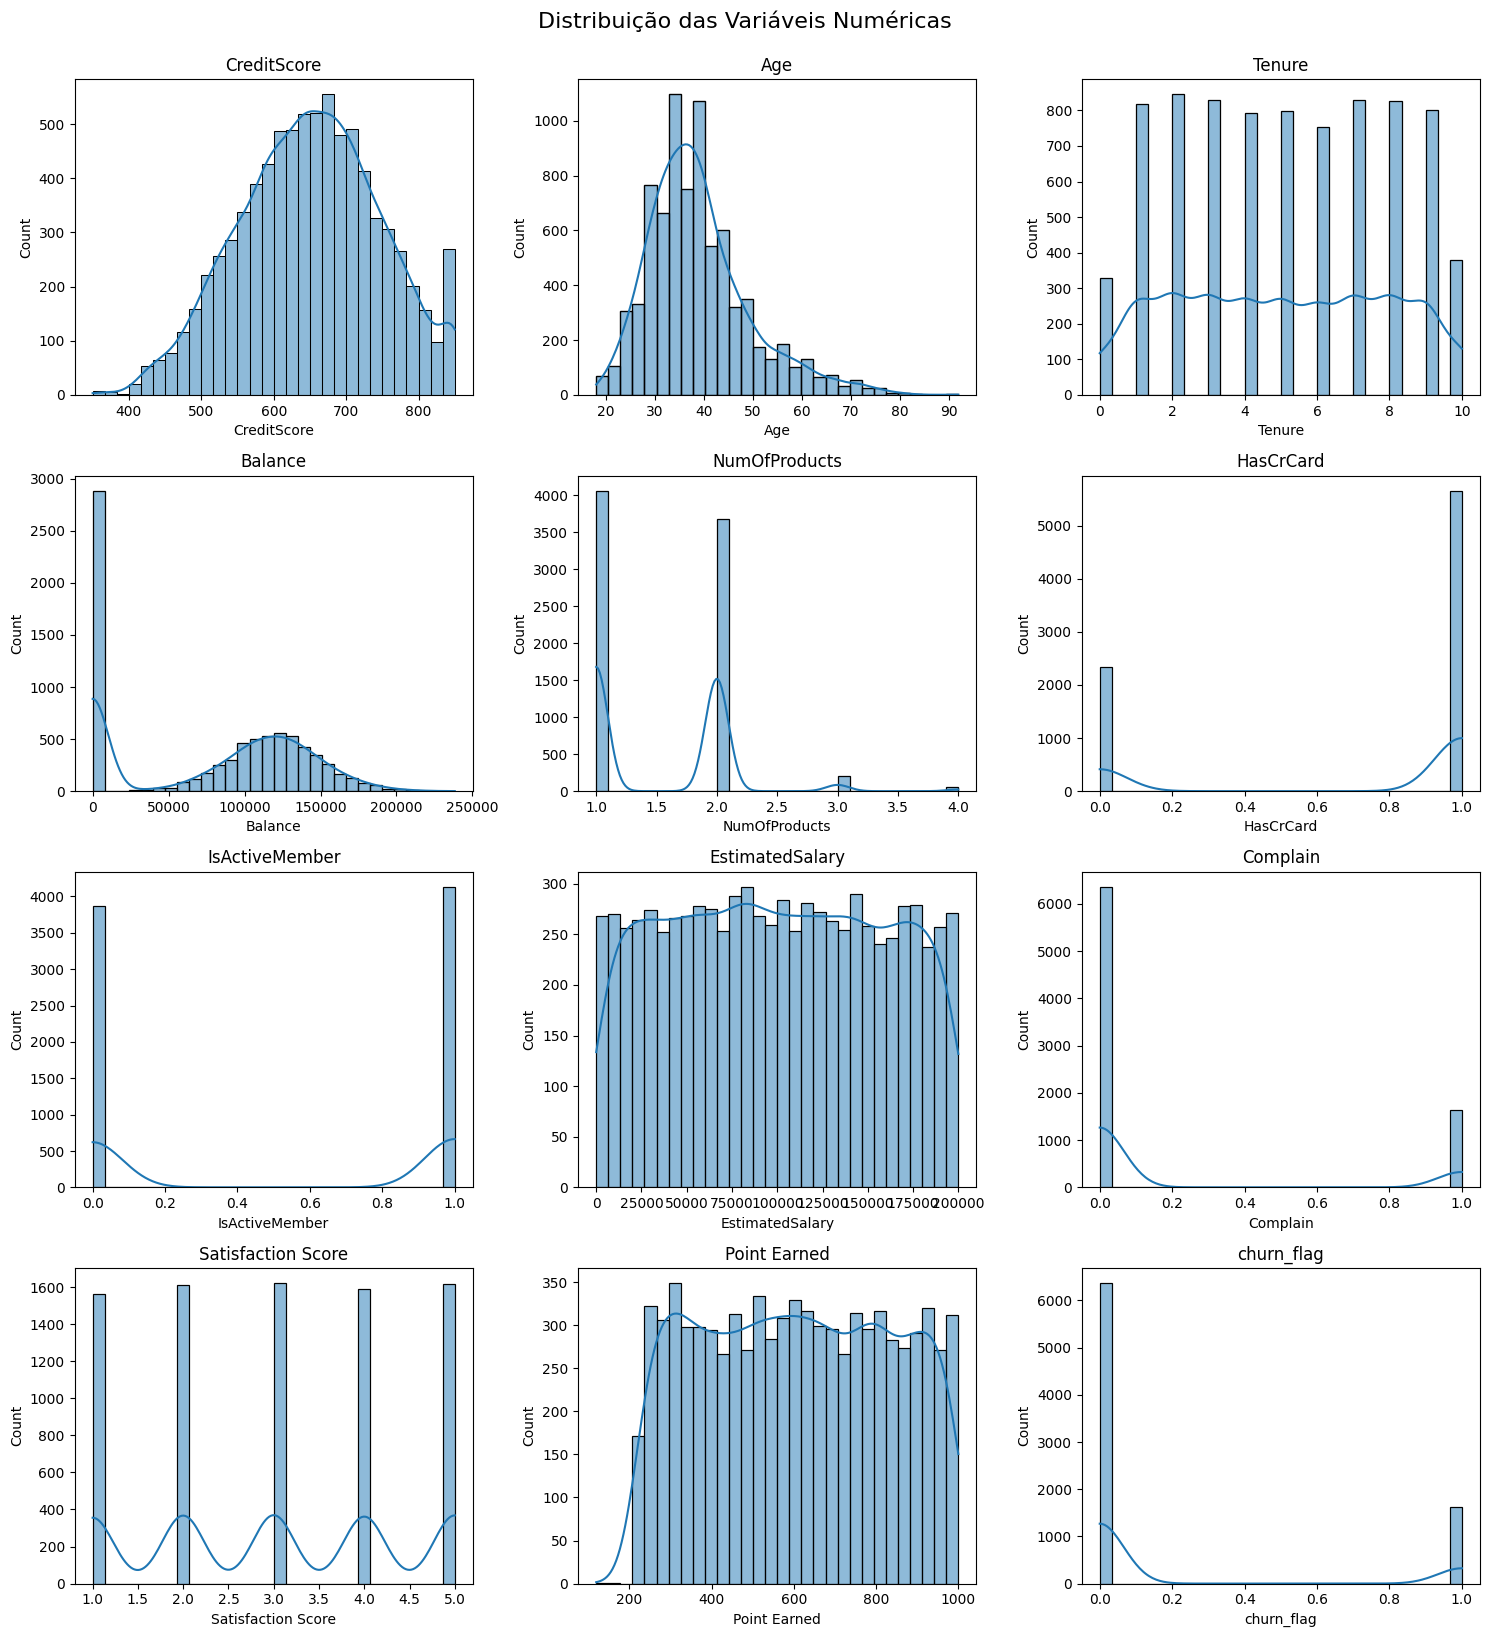

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = features_numericas
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # cálculo sem usar math

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_treino[col], bins=30, kde=True)
    plt.title(col)
    plt.tight_layout()

plt.suptitle('Distribuição das Variáveis Numéricas', fontsize=16, y=1.02)
plt.savefig('distribuicao_variaveis_numericas.png', dpi=300, bbox_inches='tight') 
plt.show()


* `CreditScore`:
    * A pontuação de crédito parece ter uma distribuição aproximadamente normal, levemente assimétrica à esquerda, com a maioria dos cliente entre 550 e 750.
    * Isso pode indicar que a base de cliente é composta predominantemente por indivíduos com pontuação de crédito médias e altas. Há menos clientes com pontuação muito baixas ou muito alta.

* `Age`:
    * Apresenta uma assimetria à direita, com um pico claro na faixa de 30-40 anos. A maioria dos cliente tem entre 25 e 50 anos.
    * A maior parte da base de cliente é composta por adultos jovens e de meia-idade. Há uma diminuição gradual no número de clientes à medida que a idade aumenta.

* `Tenure`:
    * A Distribuição é relativamente uniforme para a faixa entre 1 e 9 anos, indicando uma boa retenção durante esse periodo. Já para 0 (cliente novos) e 10 (clientes de longa data) apresenta uma menor contagem.
    * Isso pode indicar desafios em duas feses criticas do ciclo de vida do cliente: Aquisição/Retenção de novos clientes; Retenção de clientes de loga data

* `Balance`:
    * Variável muito assimétrica, com um pico muito acentuado em 0. A grenede maioria dos cliente possui saldo bancário zerado.
    * A esmagadora maioria dos clientes não mantém um saldo financeiro na instituição, ou o serviço é utilizado para transações que não envolvem a manutenção de capital. Isso pode indicar uma grande proporção de contas inativas, contas de passagem (para receber pagamentos e transferir imediatamente) ou clientes que utilizam outros produtos/serviços da empresa que não exigem saldo (ex: crédito, investimentos em outras plataformas). É essencial investigar o motivo desse saldo zero predominante para entender o perfil de uso da base de clientes.

* `NumOfProducts`:
    * A maior parte dos cliente utiliza 1 ou 2 produtos, com um pico maior em 1. Há um queda muito grande na frequência de 3 ou 4 produtos.
    * A estratégia de venda de produtos ou demanda dos clientes se concentra em 1 ou 2 produtos por cliente.

* `HasCrCard`:
    * Variável binaria. A grande maioria dos cliente possui cartão de crédito.
    * O cartão de cŕedito é um produto quase universal na base de clientes.

* `IsActiveMember`:
    * Variável binaria que indica se o cliente é ativo ou não, com uma ligeira predominância de menbros ativos.
    * A base de cliente está dividida de forma relativamente equilibrada entre ativos e não ativos.

* `EstimatedSalary`:
    * A distribuição de salário estimada é relativamente uniforme, o que não é muito comum. Isso pode indicar que a váriável é estimada com alguma aleatoriedade, ou que o dataset tem uma distribuição de renda bem equilibrada.
    * Não há uma concentração forte em nenhuma faixa salarial especifica.

* `Complain`:
    * Variável binária. A Grande maioria dos clientes não registrou reclamações.
    * A taxa de reclamações é muito baixa, o que é um bom sinal para a satisfação do cliente ou a eficiência do processo de resolução de problemas.

* `Satisfaction Score`:
    * Variável discreta, com valores de 1 a 5. A frequência de clientes em cada uma das pontuações não apresenta grandes variações.
    * A distribuição "plana", indica que não há uma grande concentraçõa de clientes em nenhum nível de satisfação.

* `Point Earned`: 
    * A distribuição de frequência também é consideravelmente uniforme ao longo da maior parte das dados (aproximadamente 250 a 1000). No entanto, há um vale na faixa de 0 e aproximadamente 250 pontos.
    * pode ser um indicador que de é mais dificil ou menos comum para os clientes acumularem poucos pontos.

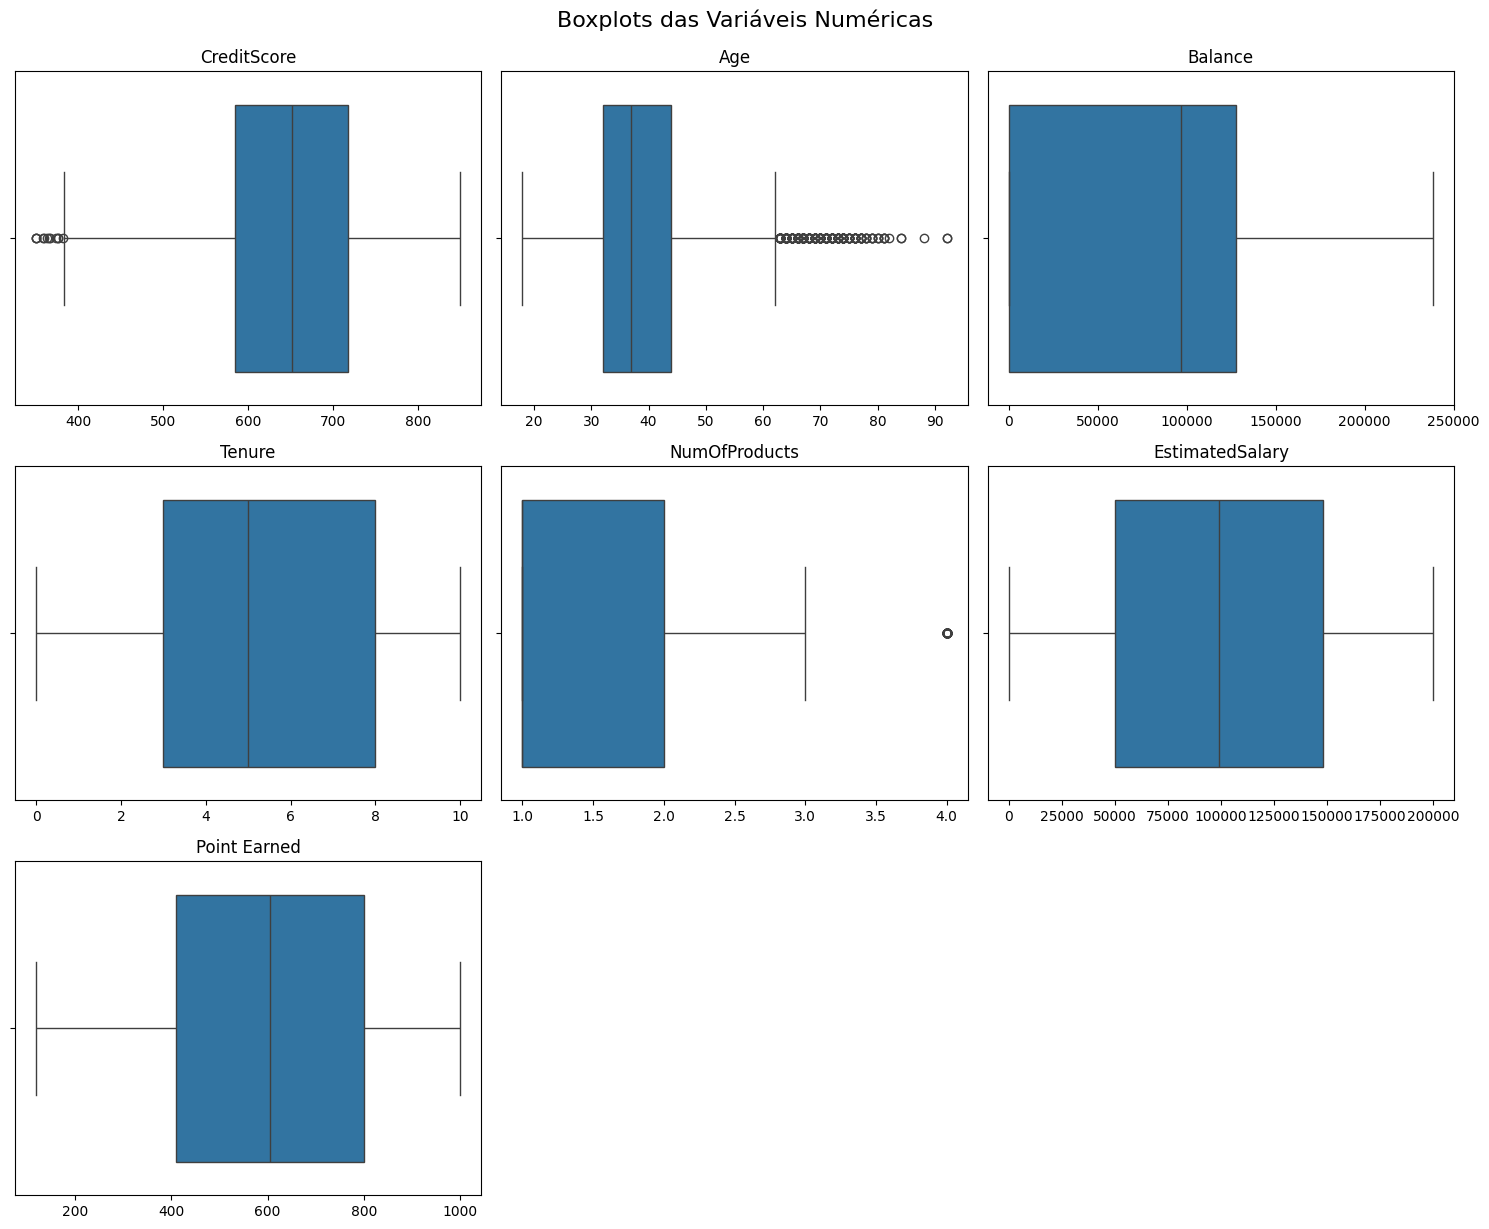

In [17]:
num_cols_for_boxplot = ['CreditScore', 'Age', 'Balance', 'Tenure', 'NumOfProducts', 'EstimatedSalary', 'Point Earned']
n_cols = 3
n_rows = (len(num_cols_for_boxplot) + n_cols - 1) // n_cols # Cálculo de número de linhas

plt.figure(figsize=(n_cols * 5, n_rows * 4)) # Ajuste o tamanho para caber os boxplots

for i, col in enumerate(num_cols_for_boxplot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df_treino[col]) 
    plt.title(col)
    plt.xlabel('') 

plt.tight_layout()
plt.suptitle('Boxplots das Variáveis Numéricas', fontsize=16, y=1.02) # Título geral
plt.savefig('boxplots_variaveis_numericas.png', dpi=300, bbox_inches='tight') # Salva a imagem
plt.show()

`CredtScore`:
* Há uma serie de pontos à esquerda do bigode inferior. Um indicativo da presença de outliers.
* Existem clientes com uma pontuação de crédito significativamente menor.

`Age`:
* Caixa ligeiramente deslocada para a esquerda, e o bigode é mais curto que o superior, indicando uma leve assimetria. Confirmando o que já foi observado no histograma.
* Há uma série de pontos a direita, acima do bigode superior. Isso significa que existem clientes com idade significativamente mais avançada em comparação com a maioria da base.
* Possivel nicho de cliente com necessidade de atendimento difetente.

`NumOfProducts`: 
* Há alguns pontos à direita, acima do bigode superior, especificamente para clientes com 4 produtos.
* A grande maioria dos clientes utiliza 1 ou 2 produtos. Os clientes com 3 ou 4 produtos são considerados outliers estatísticos por este método, o que corrobora que a adoção de múltiplos produtos é rara. Isso pode indicar uma oportunidade (se a empresa quiser que os clientes usem mais produtos) ou uma limitação do portfólio de produtos que impede a adoção de mais itens.

**Distribuição das features categoricas**

/tmp/ipykernel_29852/1498727188.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_treino, y=col, palette='viridis', order=df_treino[col].value_counts().index)
/tmp/ipykernel_29852/1498727188.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_treino, y=col, palette='viridis', order=df_treino[col].value_counts().index)
/tmp/ipykernel_29852/1498727188.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_treino, y=col, palette='viridis', order=df_treino[col].value_counts().index)


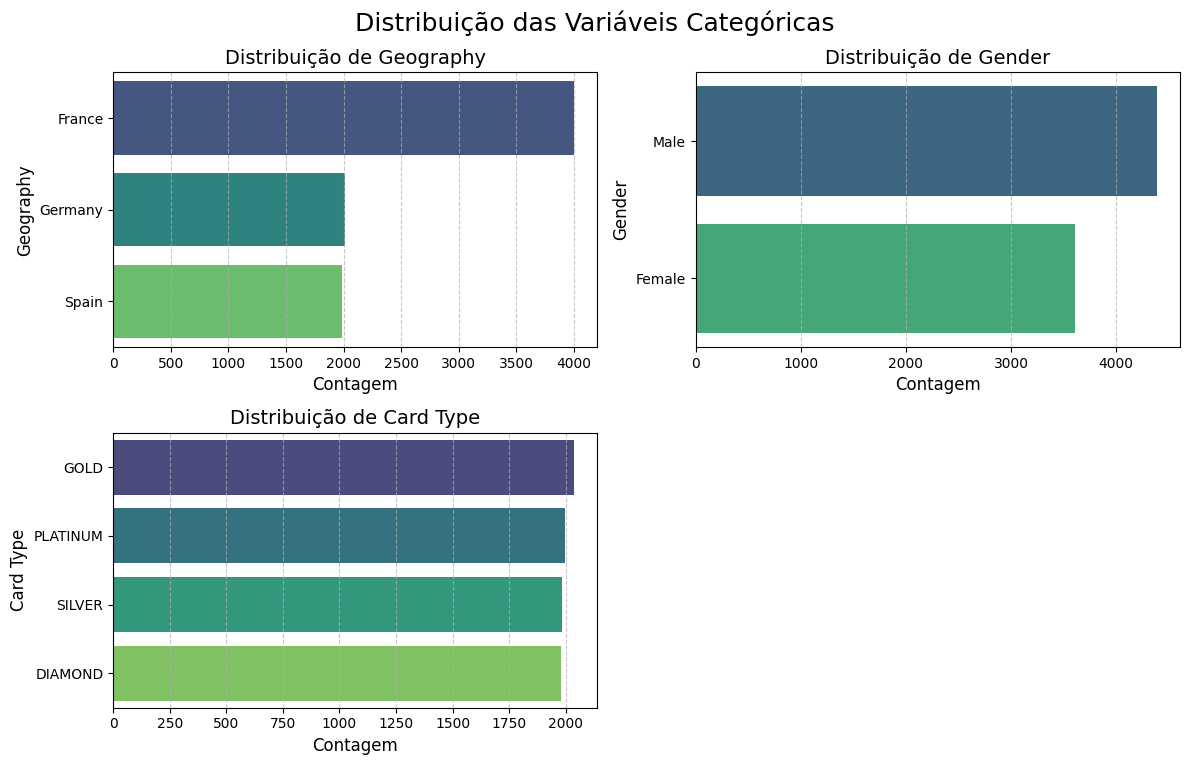

In [48]:
n_cols = 2
n_rows = (len(features_categoricas) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 4)) 

for i, col in enumerate(features_categoricas, 1):
    plt.subplot(n_rows, n_cols, i)

    sns.countplot(data=df_treino, y=col, palette='viridis', order=df_treino[col].value_counts().index)
    
    plt.title(f'Distribuição de {col}', fontsize=14)
    

    plt.xlabel('Contagem', fontsize=12) 
    plt.ylabel(col, fontsize=12)
    
    plt.xticks(rotation=0)
    
    plt.grid(axis='x', linestyle='--', alpha=0.7) 

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.suptitle('Distribuição das Variáveis Categóricas', fontsize=18, y=0.98)


plt.savefig('distribuicao_variaveis_categoricas_horizontais.png', dpi=300, bbox_inches='tight')

plt.show()

* A maior concentração de clientes está na Frnaca.
* A quantidade de clientes do sexo marculino é ligeiramente maior.
* A distribuição entre os tipos de cartões é consideravelmente homogenea.

**Análise bivariada**

Vou usar uma matrix de correlação para tentar identificar a existência de algum nivel de correlação linear entre as variáveis numéricas e o target.

In [25]:
matrix_correlacao = df_treino.corr(numeric_only=True)
matrix_correlacao['churn_flag'].sort_values(ascending=False)

churn_flag            1.000000
Complain              0.995773
Age                   0.280432
Balance               0.120726
EstimatedSalary       0.017851
Satisfaction Score   -0.003726
Tenure               -0.004108
RowNumber            -0.008573
CustomerId           -0.010551
Point Earned         -0.012095
HasCrCard            -0.016526
CreditScore          -0.030191
NumOfProducts        -0.048662
IsActiveMember       -0.147864
Name: churn_flag, dtype: float64

* `Complain`: Existem correlação positiva entre a variável e o target.
* `Age`: Existem uma correlção positiva moderada.
* `Balance`: Existem uma correlação positiva fraca.

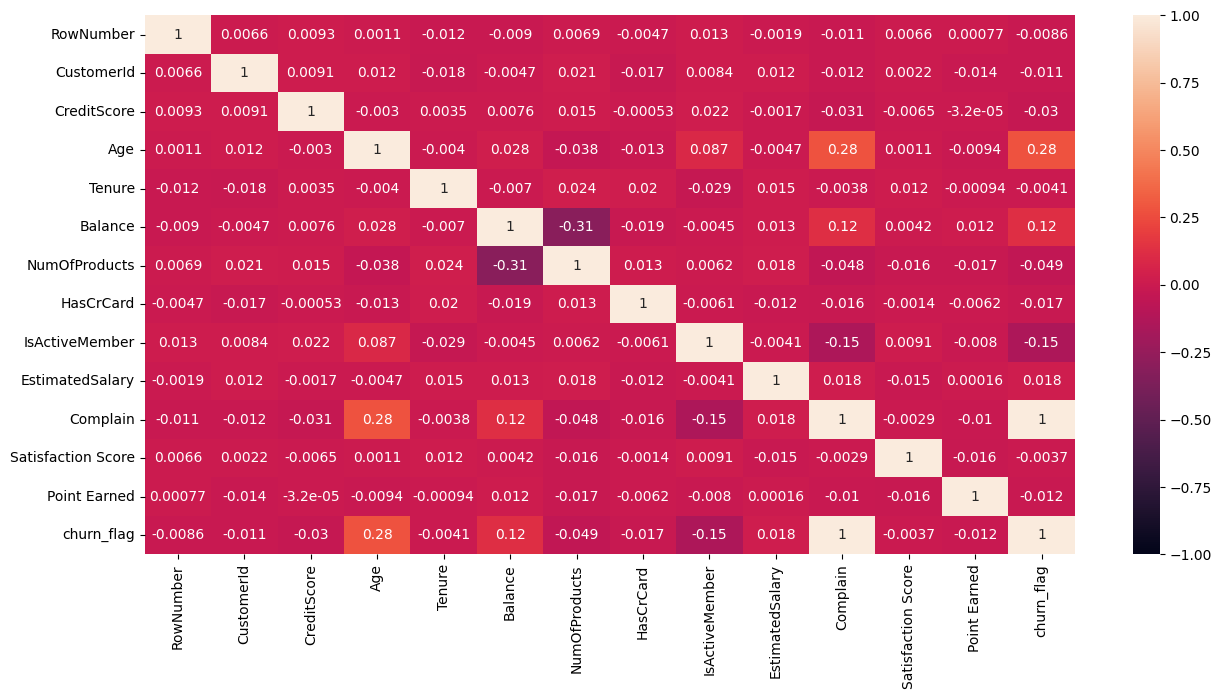

In [26]:
plt.figure(figsize=(15, 7))
sns.heatmap(matrix_correlacao, vmin=-1, vmax=1, annot=True)
plt.show()

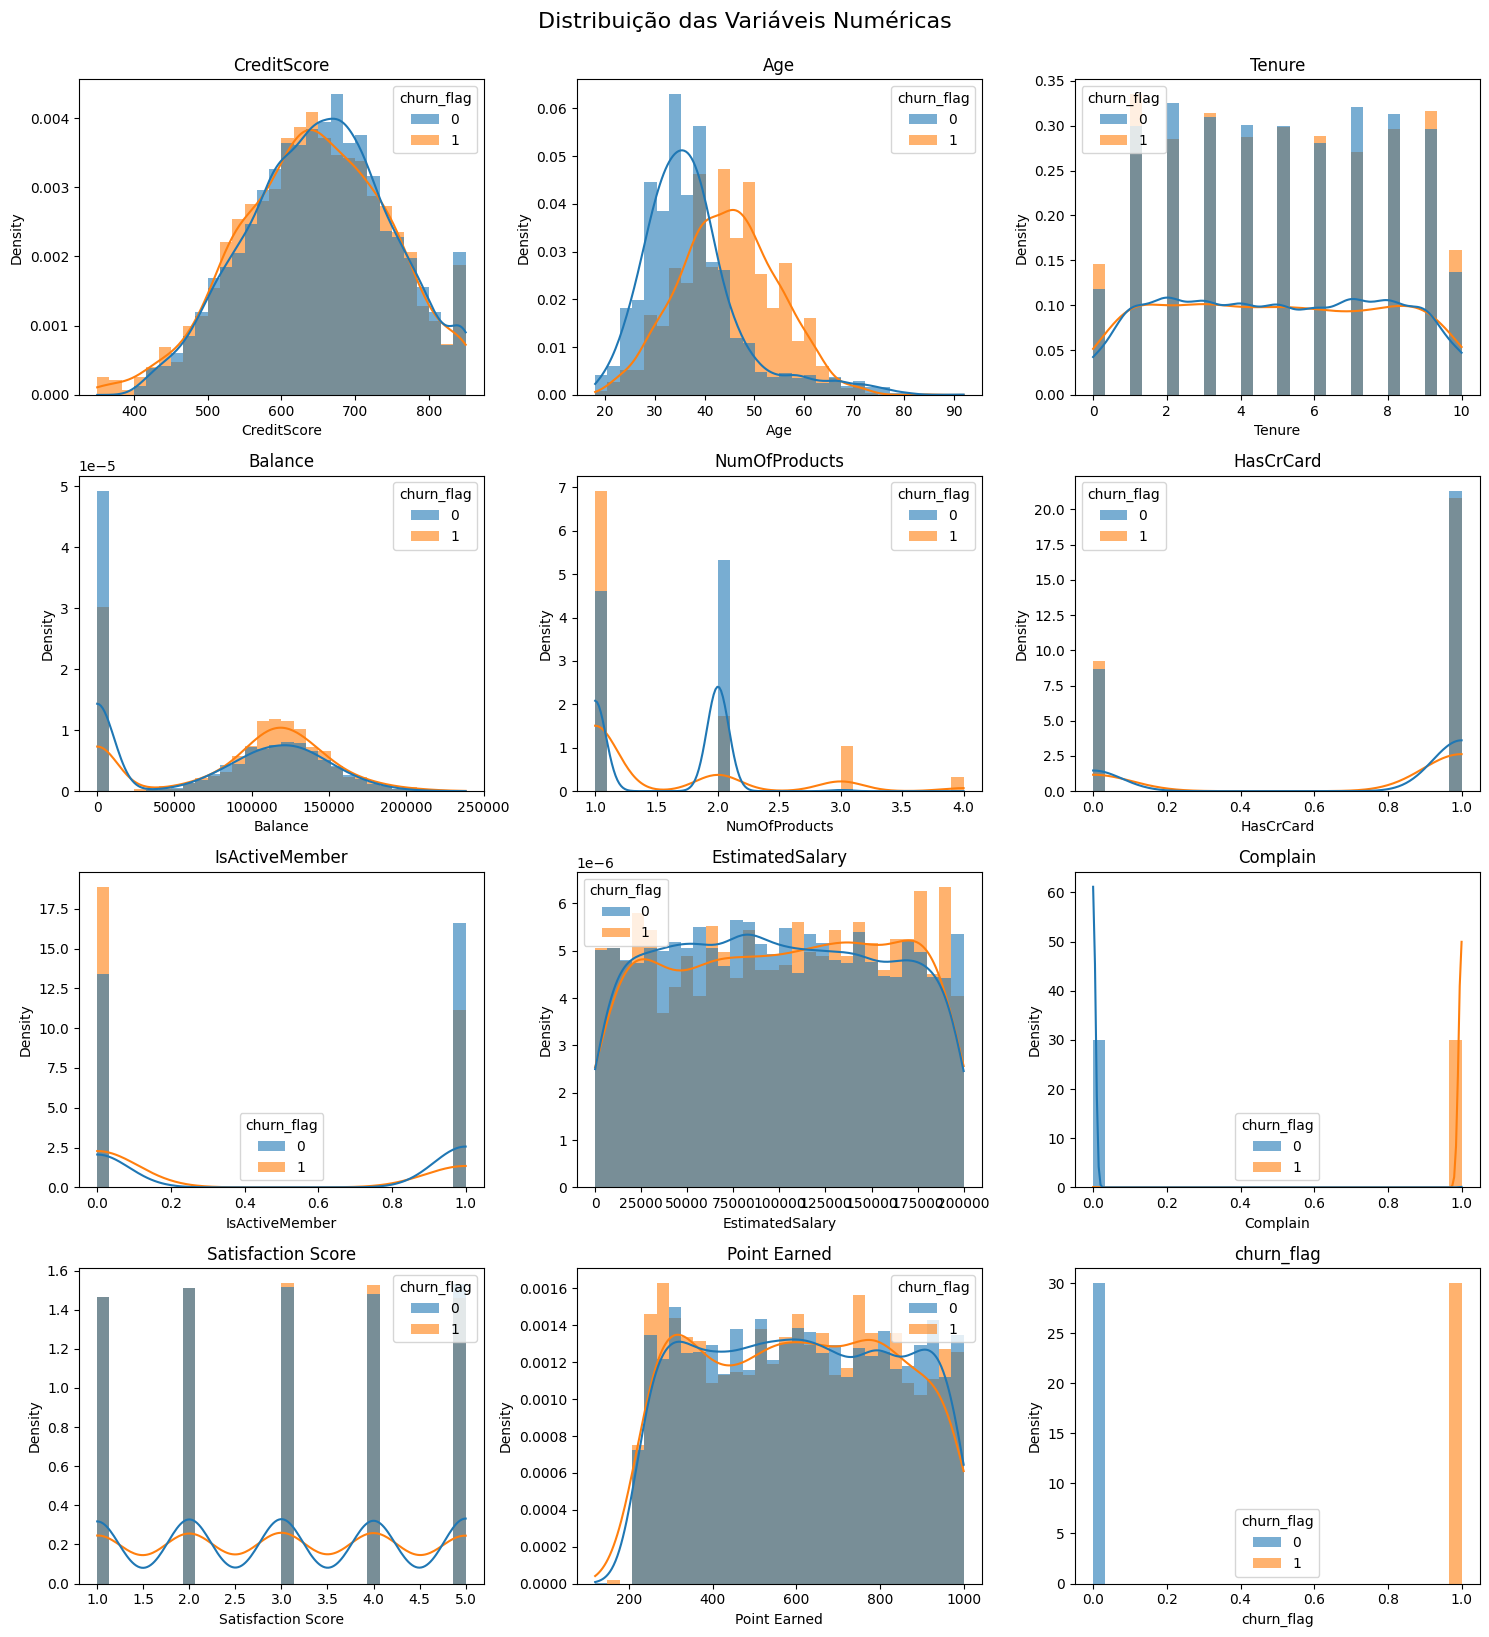

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = features_numericas
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # cálculo sem usar math

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=df_treino, x=col, bins=30, kde=True, hue='churn_flag', 
                 common_norm=False, stat='density', alpha=0.6, linewidth=0)
    plt.title(col)
    plt.tight_layout()

plt.suptitle('Distribuição das Variáveis Numéricas', fontsize=16, y=1.02)
plt.savefig('distribuicao_variaveis_numericas.png', dpi=300, bbox_inches='tight') 
plt.show()


* `CreditScore`: Leve tendência para cliente de pontuação menor realizarem churn.
    * Clientes com pontuação muito boas (acima de 700), tem menor propensão ao churn.
    * Cliente com pontuação menores que 700, tem uma leve tendencia ao churn.
* `Age`: Clientes que realizam churn tendem a ser, em média, mais velhos o que os que permanecem.
    * Cliente mais jovens (20-35 anos), parecem ter uma menor propensão de churn.
    * Cliente mais velhos (Apartir de 40 anos), tem mais propensão a ao churn.